KPMG Virtual Internship
For context, Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour.

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation.

Import important libraries which will be used in program.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import datetime

Importing datasets into pandas dataframe.

In [2]:
data = pd.ExcelFile("KPMG_VI_New_raw_data_update_final_data_cleaning.xlsx")

Reading each file separately

In [3]:
trans = pd.read_excel(data, 'Transactions')
cus_demo = pd.read_excel(data, 'CustomerDemographic')
cus_add = pd.read_excel(data, 'CustomerAddress')



Data Preprocessing

In [4]:
cus_demo.loc[cus_demo['Age'] < 100, 'Age_category(yrs.)'] = 'Senior Citizen(61-100)'
cus_demo.loc[cus_demo['Age'] < 60, 'Age_category(yrs.)'] = 'Senior Adult(50-60)'
cus_demo.loc[cus_demo['Age'] < 49, 'Age_category(yrs.)'] = 'Adult(25-49)'
cus_demo.loc[cus_demo['Age'] < 24, 'Age_category(yrs.)'] = 'Youth(<24)'

cus_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age_category(yrs.)
0,1,Laraine,Medendorp,Female,93,1953-10-12,68.810195,Executive Secretary,Health,Mass Customer,N,Yes,11,Senior Citizen(61-100)
1,2,Eli,Bockman,Male,81,1980-12-16,41.612935,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,Adult(25-49)
2,3,Arlin,Dearle,Male,61,1954-01-20,68.536222,Recruiting Manager,Property,Mass Customer,N,Yes,15,Senior Citizen(61-100)
3,9,Mala,Lind,Female,97,1973-03-10,49.388277,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8,Senior Adult(50-60)
4,10,Fiorenze,Birdall,Female,49,1988-10-11,33.788277,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20,Adult(25-49)


In [5]:
cus_demo["Age"] = pd.to_numeric(cus_demo["Age"])    
cus_demo["tenure"] = pd.to_numeric(cus_demo["tenure"])    
cus_demo["past_3_years_bike_related_purchases"] = pd.to_numeric(cus_demo["past_3_years_bike_related_purchases"])  
cus_demo.shape


(2779, 14)

In [6]:
## CAlculate total number of null/missing values in customer deomgraphic dataframe.
cus_demo.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
Age                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age_category(yrs.)                     0
dtype: int64

In [7]:
cus_demo['customer_id'].value_counts()

1       1
2612    1
2604    1
2605    1
2606    1
       ..
1306    1
1307    1
1310    1
1311    1
3997    1
Name: customer_id, Length: 2779, dtype: int64

In [8]:
cus_demo = cus_demo.dropna(subset = ['job_industry_category'], how ='all')

## Check shape of dataframe
cus_demo.shape

(2779, 14)

In [9]:
## Check total number of customers after removing null values in job category coulmn in cus_demo dataframe.
cus_demo['customer_id'].value_counts()

1       1
2612    1
2604    1
2605    1
2606    1
       ..
1306    1
1307    1
1310    1
1311    1
3997    1
Name: customer_id, Length: 2779, dtype: int64

In [10]:
## Check shape of transaction  dataset.
trans.shape

(19445, 13)

In [11]:
## Check total number of customers in transaction dataset.
trans['customer_id'].value_counts()

1068    14
2476    14
2183    14
1302    13
2912    13
        ..
3392     1
2271     1
2328     1
1865     1
3161     1
Name: customer_id, Length: 3492, dtype: int64

In [12]:
## Check shape of customer address dataset.
cus_add.shape

(3999, 6)

Create new dataframe which is intersaction of transaction and cus_demo or cus_address.

In [13]:
trans_cus = pd.merge(cus_demo, trans, on="customer_id", how='inner')

In [14]:
trans_cus.head(3)
trans_cus.shape

(13640, 26)

In [15]:
## Count total number of customers who have done transactions.
trans['customer_id'].value_counts()

1068    14
2476    14
2183    14
1302    13
2912    13
        ..
3392     1
2271     1
2328     1
1865     1
3161     1
Name: customer_id, Length: 3492, dtype: int64

In [16]:
## Create a intersaction dataframe of customer demographic with transaction and there address dataframe. 
combo_cus = pd.merge(trans_cus, cus_add, on='customer_id', how='inner')

In [17]:
## Shape of intersaction dataframe.
combo_cus.shape

(13628, 31)

In [18]:
combo_cus['customer_id'].value_counts()

2476    14
2183    14
637     13
1302    13
2464    13
        ..
1544     1
431      1
3292     1
1920     1
1204     1
Name: customer_id, Length: 2446, dtype: int64

In [19]:
## Columns name of intersaction dataframe of three dataframe.
combo_cus.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'Age_category(yrs.)', 'transaction_id',
       'product_id', 'transaction_date', 'online_order', 'order_status',
       'brand', 'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'address', 'postcode',
       'state', 'country', 'property_valuation'],
      dtype='object')

In [20]:
combo_cus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13628 entries, 0 to 13627
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          13628 non-null  int64         
 1   first_name                           13628 non-null  object        
 2   last_name                            13628 non-null  object        
 3   gender                               13628 non-null  object        
 4   past_3_years_bike_related_purchases  13628 non-null  int64         
 5   DOB                                  13628 non-null  datetime64[ns]
 6   Age                                  13628 non-null  float64       
 7   job_title                            13628 non-null  object        
 8   job_industry_category                13628 non-null  object        
 9   wealth_segment                       13628 non-null  object        
 10  deceased_i

In [21]:
combo_cus.transaction_date

0       2017-12-23
1       2017-04-06
2       2017-05-11
3       2017-01-05
4       2017-02-21
           ...    
13623   2017-03-07
13624   2017-04-02
13625   2017-11-08
13626   2017-09-01
13627   2017-09-12
Name: transaction_date, Length: 13628, dtype: datetime64[ns]

Data Exploration & Visualization

Cutomer Address Dataframe

Which states has more number of bike customers.

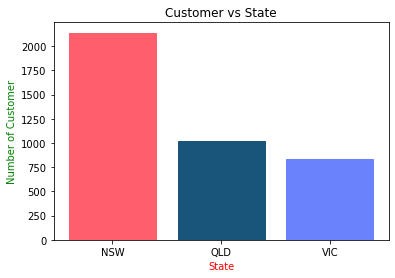

In [22]:
bar_graph1= plt.bar(cus_add.state.unique(), cus_add["state"].value_counts())

bar_graph1[0].set_color('#FF5F6D')
bar_graph1[1].set_color('#19547b')
bar_graph1[2].set_color('#6A82FB')

plt.ylabel('Number of Customer', color='g')
plt.xlabel('State', color='r')
plt.title("Customer vs State")
plt.show()

According to data, NSW people purchased more bikes and cycles. Sprocket Central Pty Ltd have more customer base in NSW and lesser in VIC. That means they still need to work on marketing to reach out their product to VIC.

Customer Demographic Dataframe

Which gender purchases more bikes

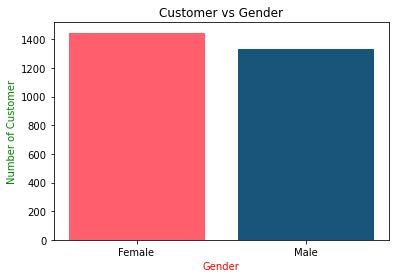

In [23]:
bar_graph2 = plt.bar(cus_demo.gender.unique(), cus_demo["gender"].value_counts() )

bar_graph2[0].set_color('#FF5F6D')
bar_graph2[1].set_color('#19547b')

plt.ylabel('Number of Customer', color ='g')
plt.xlabel('Gender', color='r')
plt.title("Customer vs Gender")
plt.show()

Sprocket Central Pty Ltd company has slightly more female customers than male. But the difference is not so large.

Customers of different age group

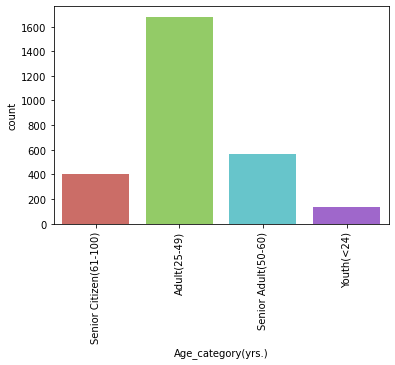

In [24]:
sns.countplot(x='Age_category(yrs.)', data= cus_demo, palette='hls')
plt.xticks(rotation ='vertical')
plt.show()

Exploring bike customers who owns car

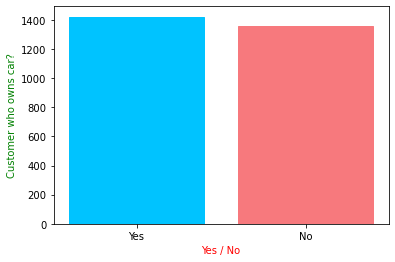

In [25]:
bar_graph3 = plt.bar(cus_demo.owns_car.unique(), cus_demo["owns_car"].value_counts())

bar_graph3[0].set_color('#00c3ff')
bar_graph3[1].set_color('#f7797d')

plt.ylabel('Customer who owns car?', color ='g')
plt.xlabel('Yes / No', color='r')
plt.show()

According to data, most of the customers who purchases bike and cycling accessories from Sprocket Central Pty Ltd have car. May be their work place is near to their house or they are helping in reducing greenhouse gas production. But there is negligible difference.

Which wealth segment purchases more bikes

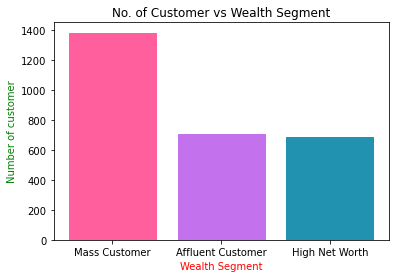

In [26]:
bar_graph4 = plt.bar(cus_demo.wealth_segment.unique(), cus_demo["wealth_segment"].value_counts())

bar_graph4[0].set_color('#FF5F9D')
bar_graph4[1].set_color('#c471ed')
bar_graph4[2].set_color('#2193b0')

plt.ylabel('Number of customer', color='g')
plt.xlabel('Wealth Segment', color='r')
plt.title("No. of Customer vs Wealth Segment")
plt.show()

A large number customers who purchased bikes and cycling accessories from Sprocket Central Pty Ltd belongs to "Mass customer" wealth segment category.

Which gender purchased more bikes in past 3 years

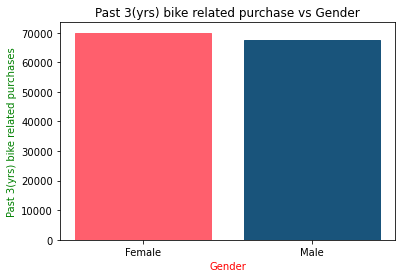

In [27]:
result = cus_demo.groupby("gender").sum()
bar_graph5 = plt.bar(cus_demo.gender.unique(), result["past_3_years_bike_related_purchases"])

bar_graph5[0].set_color('#FF5F6D')
bar_graph5[1].set_color('#19547b')

plt.ylabel('Past 3(yrs) bike related purchases', color='g')
plt.xlabel('Gender', color='r')
plt.title("Past 3(yrs) bike related purchase vs Gender")
plt.show()

In past 3 years female purchased more bikes related accessories from Sprocket Central Pty Ltd.

Customers belongs to which job industry

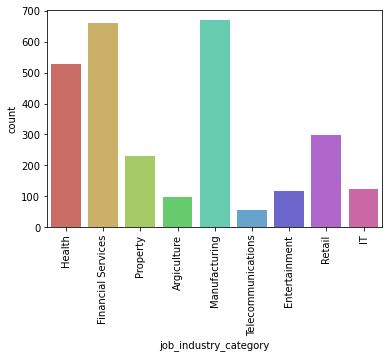

In [28]:
sns.countplot(x='job_industry_category', data= cus_demo, palette='hls')
plt.xticks(rotation ='vertical')
plt.show()

Transactions Dataset

Which size of product is most selling and the does the cost of product increases sell

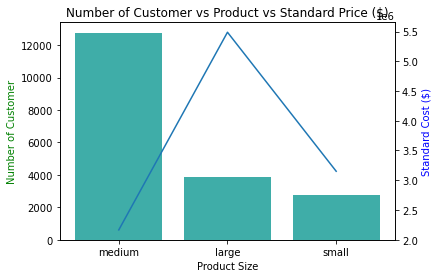

In [29]:
results = trans.groupby("product_size").sum()

fig,ax1=plt.subplots()

ax2 = ax1.twinx()
ax1.bar(trans.product_size.unique(), trans["product_size"].value_counts(), color = '#3fada8')
ax2.plot(trans.product_size.unique(), results["standard_cost"])

ax1.set_xlabel('Product Size')
ax1.set_ylabel('Number of Customer', color ='g')
ax2.set_ylabel('Standard Cost ($)', color='b')
plt.title("Number of Customer vs Product vs Standard Price ($)")
plt.show()

Which brand is most selling brand.

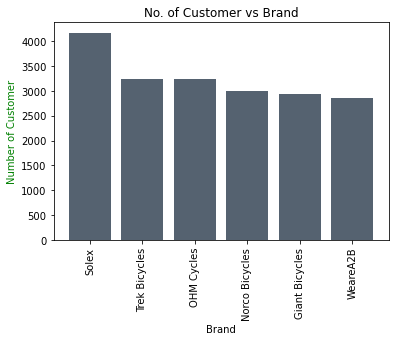

In [30]:
plt.bar(trans.brand.unique(), trans["brand"].value_counts(), color='#556270')

plt.xticks(rotation = "vertical", size=10)
plt.ylabel('Number of Customer', color='g')
plt.xlabel('Brand')
plt.title("No. of Customer vs Brand")
plt.show()

According to transactions dataframe, most selling brand of Sprocket Central Pty Ltd is Trek Bicycles and there is not much difference in other brands